In [0]:
# Idea is to use pre-trained model for your use case
# Image classify: MobileNet | NLP: GloVe and word2vec

In [32]:
# Transfer Learning with ResNet50 trained on imagenet dataset to classify images 
from google.colab import files
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input,decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np
#uploaded = files.upload()
!ls

Audi.jpg  fruit.jpg  Koala.jpg	sample_data  warship.jpg


In [0]:
# Load image, rescale as model needs and use preprocess_input to normalise
imgPath = 'Koala.jpg'
koala = image.load_img(imgPath,target_size=(224,224))
img = image.img_to_array(koala)
img = np.expand_dims(img,axis=0)
img = preprocess_input(img)

In [0]:
# Load the ResNet50 model
model = ResNet50(weights='imagenet')

In [35]:
# Run a prediction
predict = model.predict(img)
# Decodes results into tuples list (class,description,probability). Top 3 guesses
print('Prediction: ',decode_predictions(predict,top=3)[0])

Prediction:  [('n01882714', 'koala', 0.99950683), ('n02500267', 'indri', 0.00040866478), ('n02497673', 'Madagascar_cat', 4.1839965e-05)]


In [0]:
# Test on other images
def classifyImage(imgPath):
  display(Image(filename=imgPath))
  picture = image.load_img(imgPath,target_size=(224,224))
  img = image.img_to_array(picture)
  img = np.expand_dims(img,axis=0)
  img = preprocess_input(img)

  predict = model.predict(img)
  print('Prediction: ',decode_predictions(predict,top=3)[0])

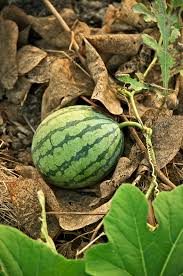

Prediction:  [('n01644900', 'tailed_frog', 0.61653435), ('n01644373', 'tree_frog', 0.110453166), ('n07716906', 'spaghetti_squash', 0.056247048)]


In [39]:
classifyImage('fruit.jpg')


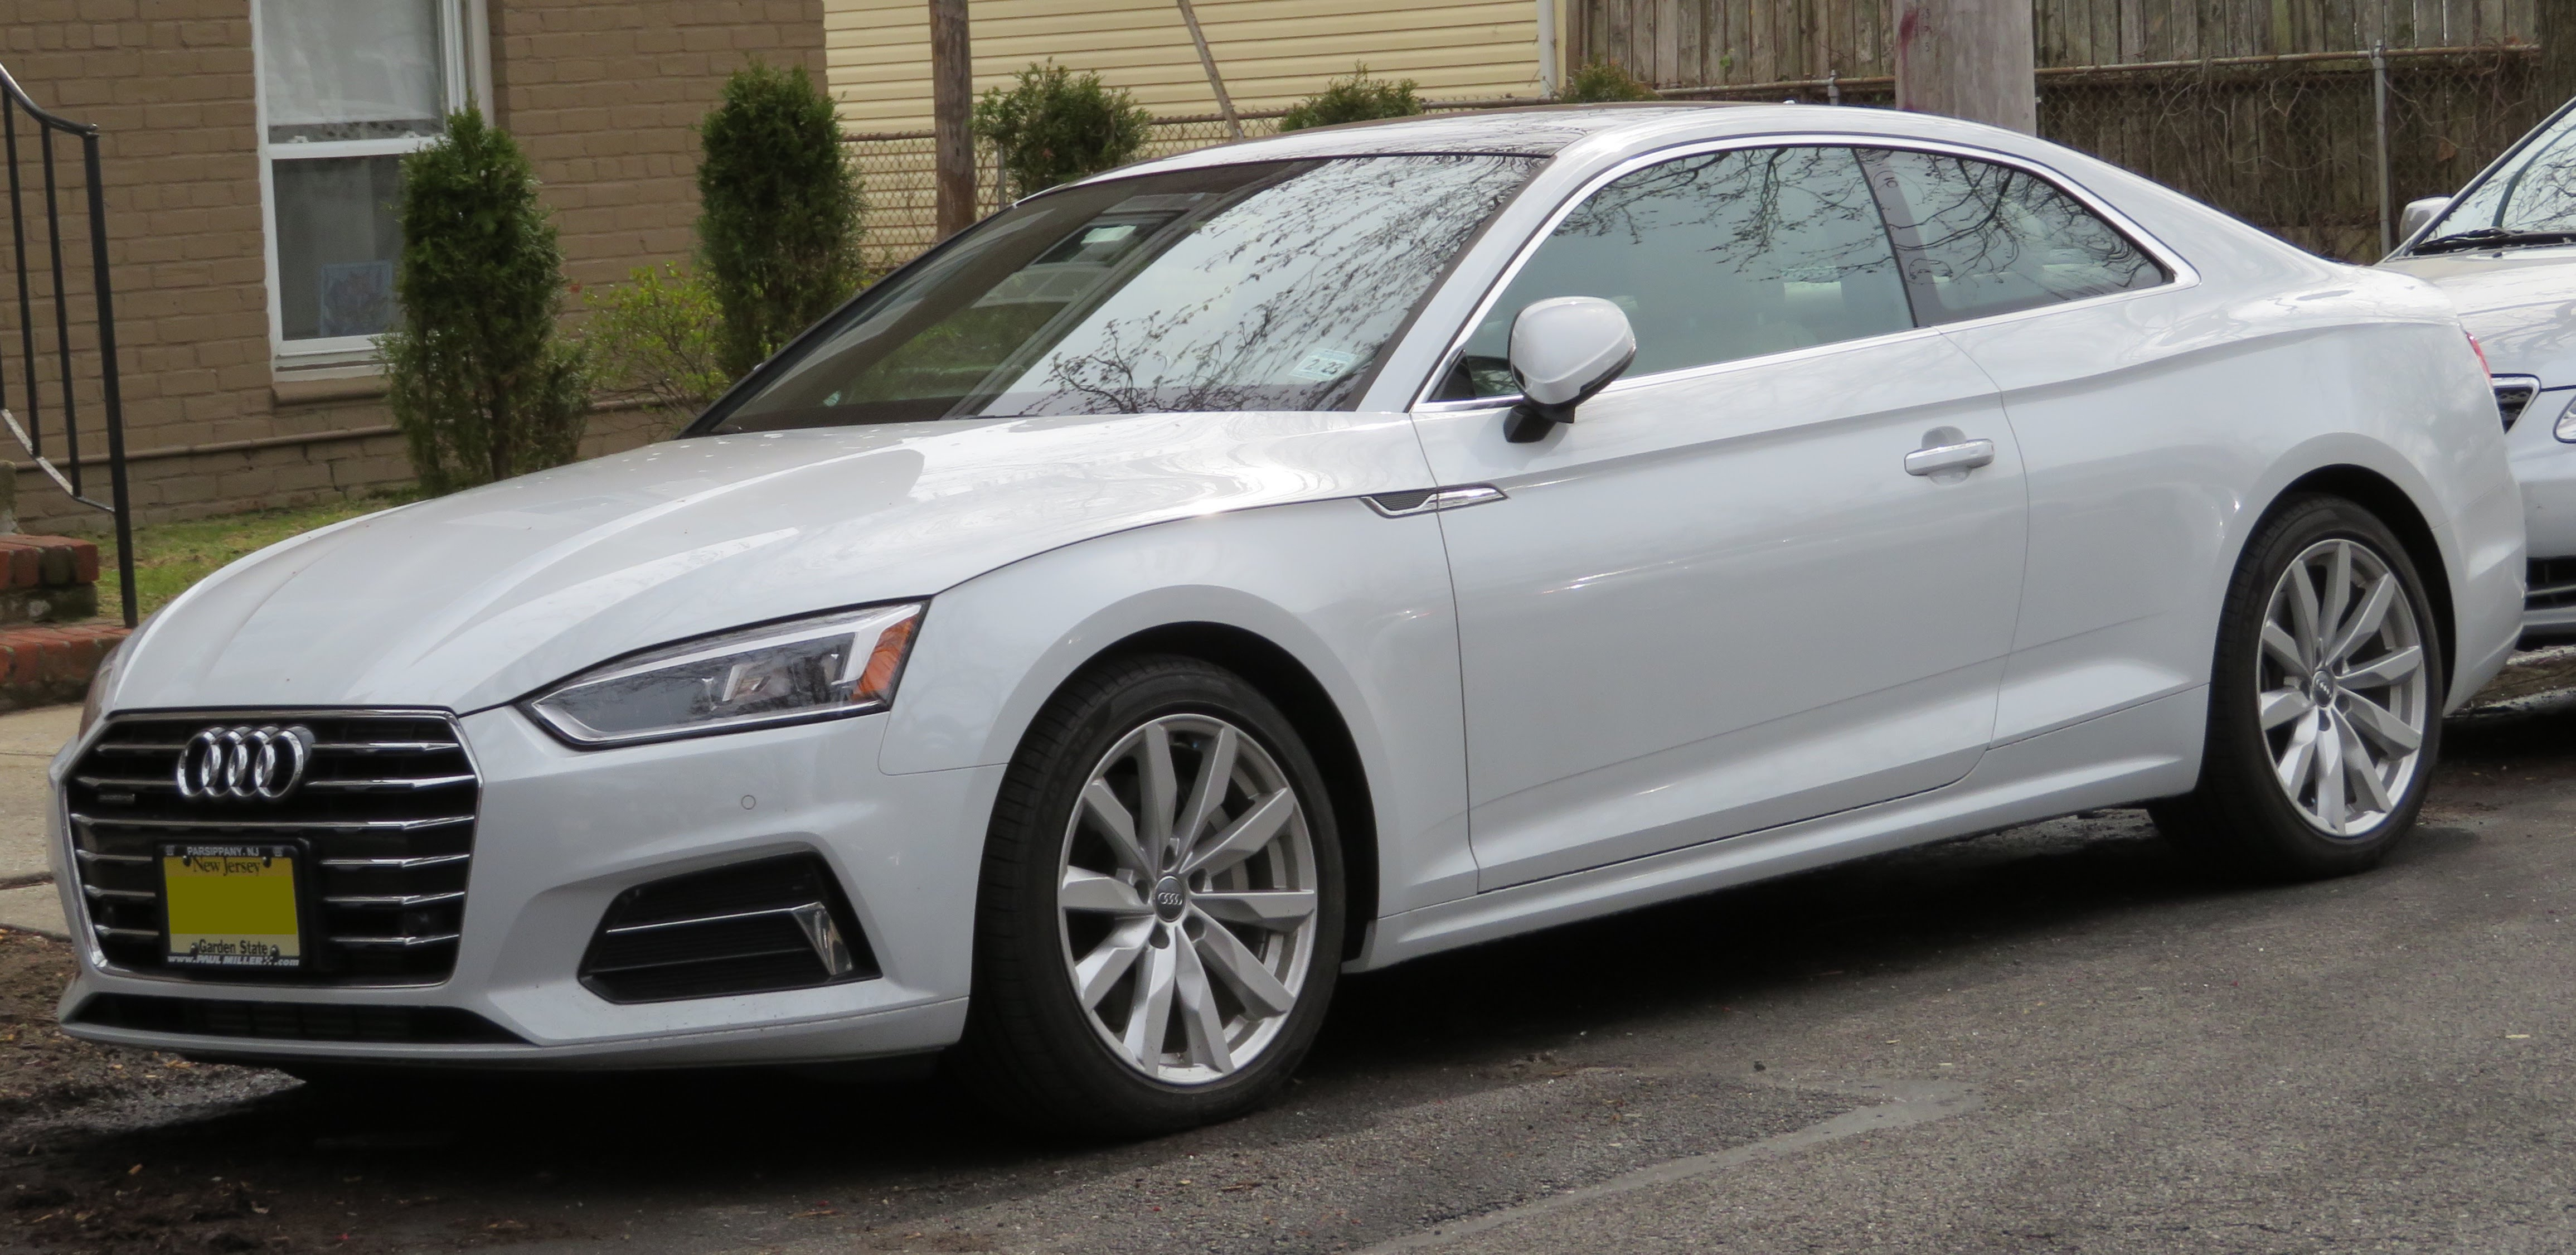

Prediction:  [('n03459775', 'grille', 0.37461445), ('n03895866', 'passenger_car', 0.13591595), ('n02814533', 'beach_wagon', 0.11481872)]


In [40]:
classifyImage('Audi.jpg')


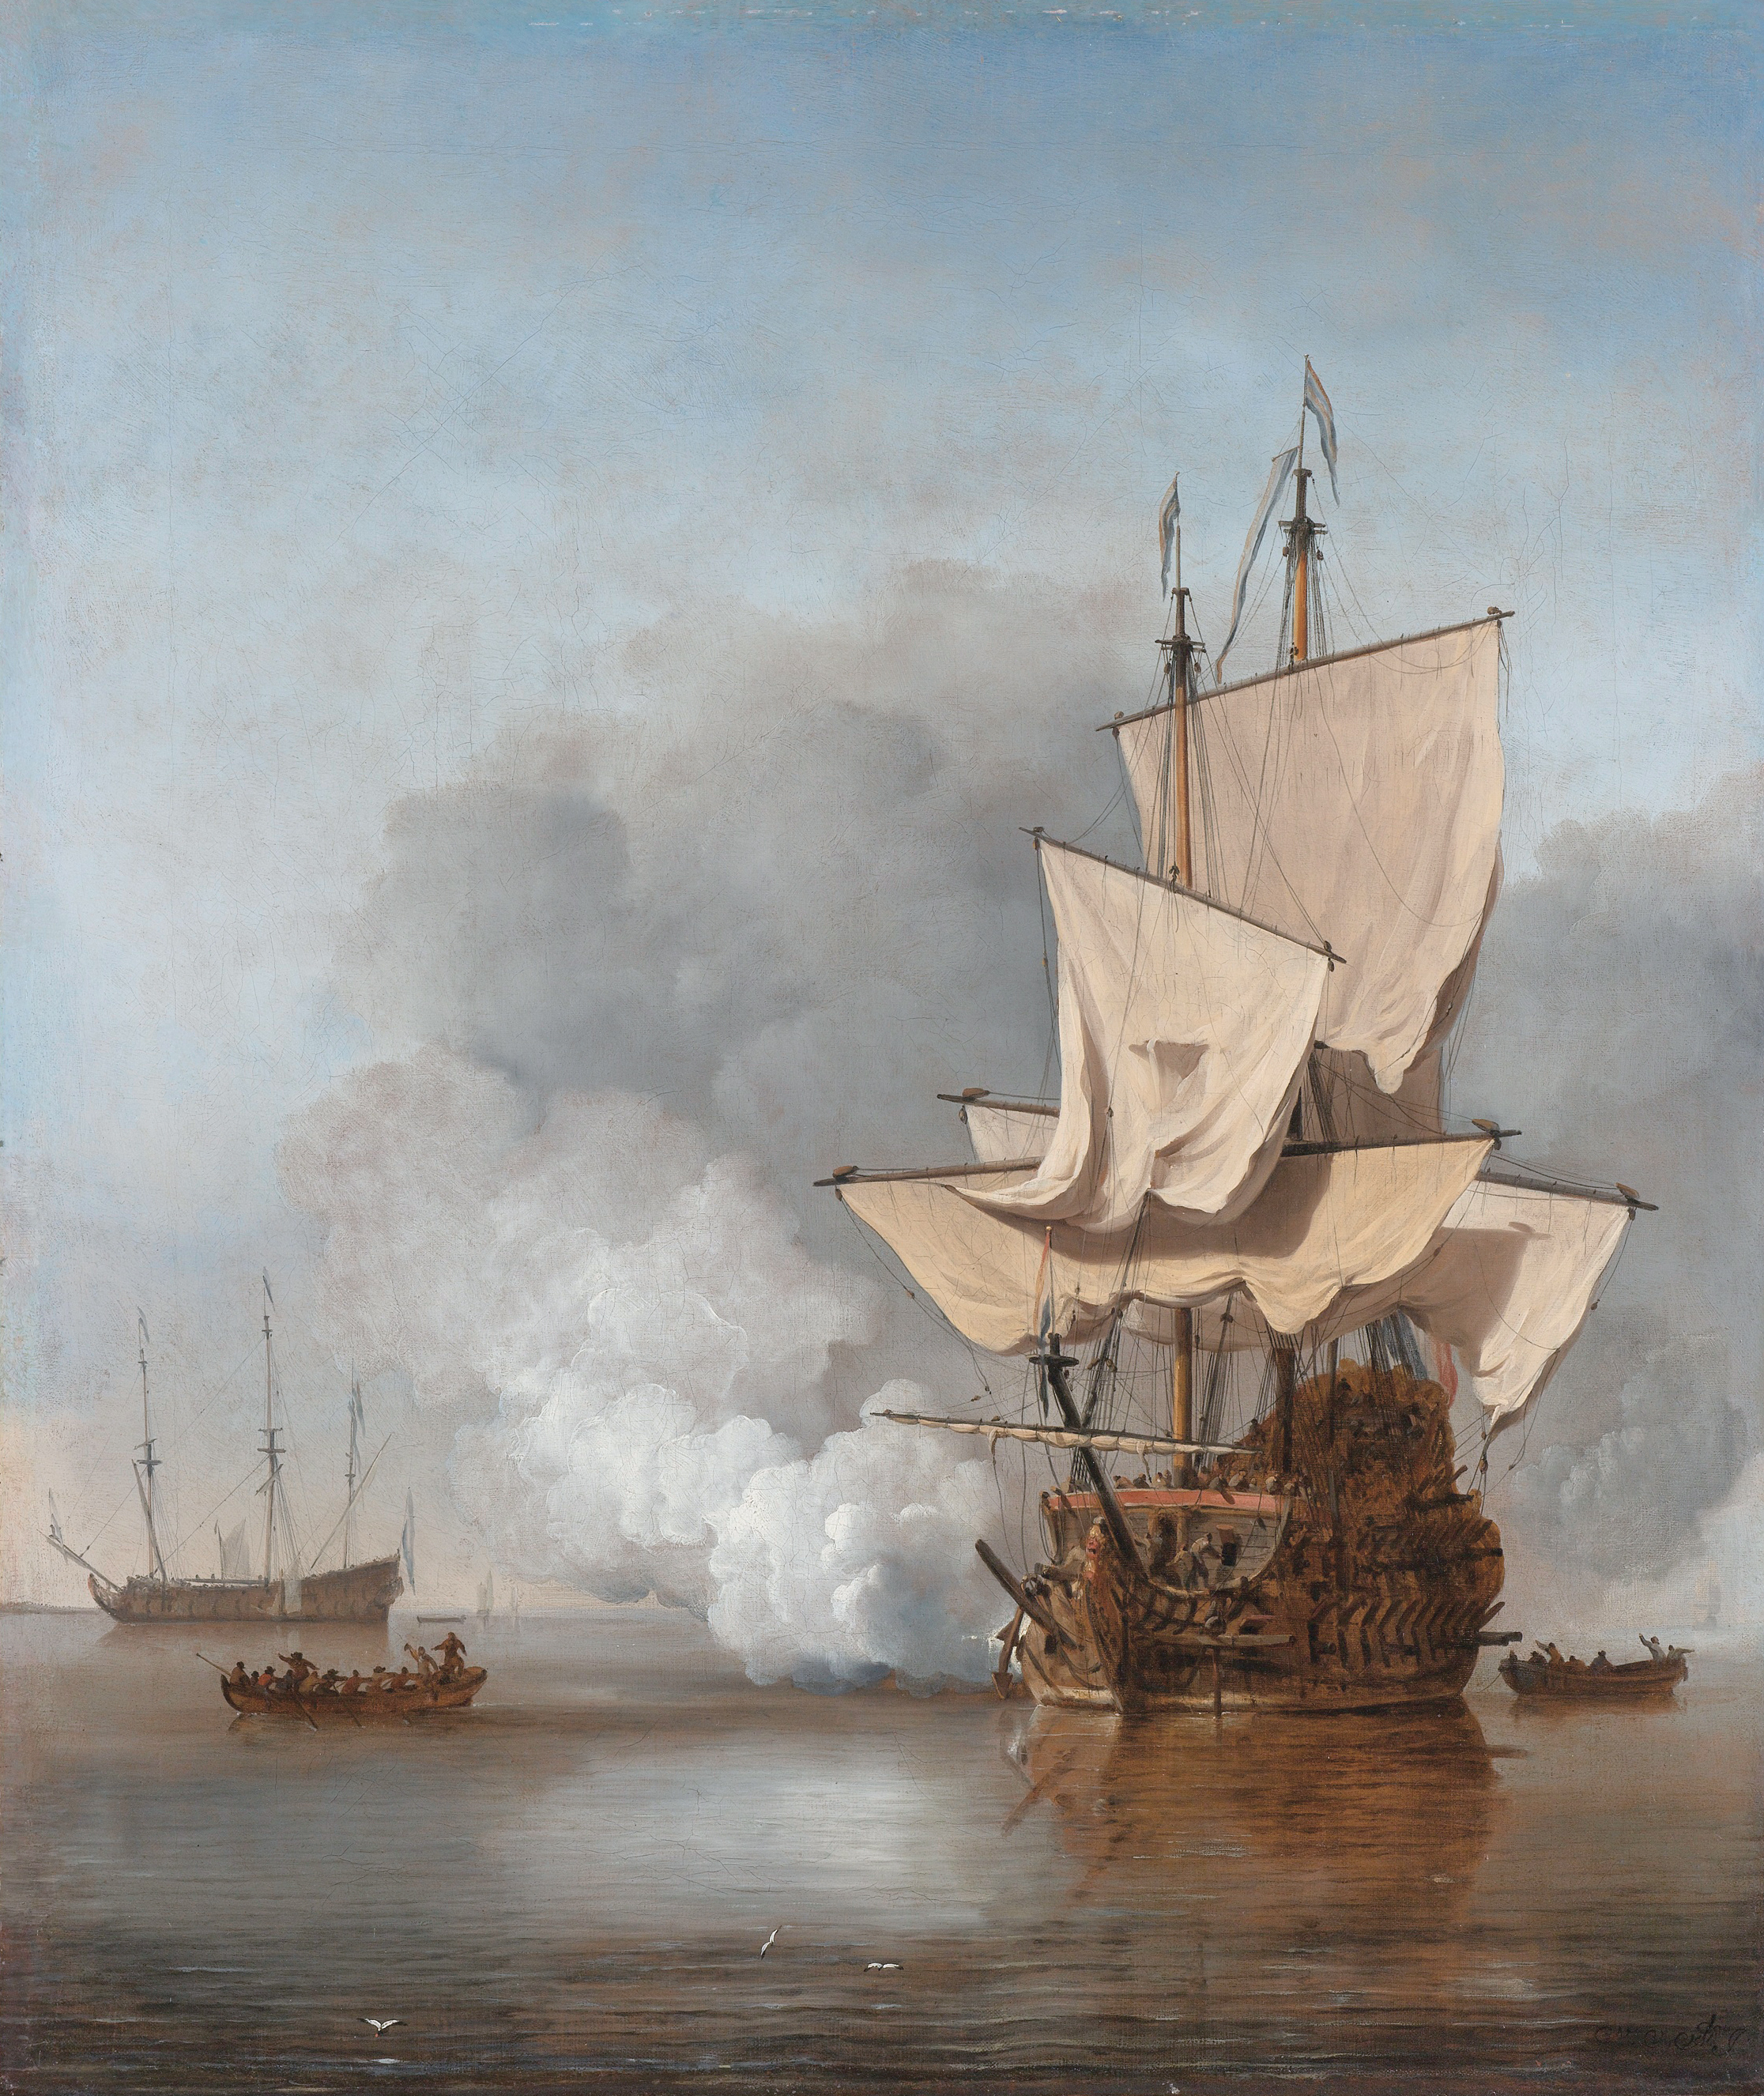

Prediction:  [('n03947888', 'pirate', 0.58115166), ('n03388043', 'fountain', 0.32195008), ('n04606251', 'wreck', 0.058022987)]


In [41]:
classifyImage('warship.jpg')